In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import re

from scipy.stats import hmean
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import norm

import string
import html
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('/Users/alenjose/Desktop/data/project_data/model_info/LSTM_BLM_prediction')

In [35]:
# Display random positive tweets
print("Positive tweets:")
print(df[df['sentiments'] == 'positive']['tweet_text_with_sw'].sample(5))

# Display random negative tweets
print("\nNegative tweets:")
print(df[df['sentiments'] == 'negative']['tweet_text_with_sw'].sample(5))

Positive tweets:
40461          thought marth players hate the fox mu on fd
21666                                               thanks
39321                                      power puff dave
368      lot different than blm raiding targets and set...
25949                         blm no one else lives matter
Name: tweet_text_with_sw, dtype: object

Negative tweets:
22409       literally me every time splatfest rolls around
8412     all blm donations goto actblue which distribut...
41411    really hope he comes out with rainbow tape on ...
7313     its from pm on purpose come afterwards it gets...
14939                                            well said
Name: tweet_text_with_sw, dtype: object


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf.fit_transform(df['tweet_text_with_sw'])

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

threshold = 0.1 

# Initialize CountVectorizer
cvec = CountVectorizer()

# Fit the CountVectorizer on your text data
X_cvec = cvec.fit_transform(df['tweet_text_with_sw'])

# Create a DataFrame for term frequencies
term_freq_df = pd.DataFrame(X_cvec.toarray(), columns=cvec.get_feature_names_out())

# Calculate variance and mean for each word
term_freq_df['variance'] = term_freq_df.var(axis=0)
term_freq_df['mean'] = term_freq_df.mean(axis=0)

# Identify low variance words
low_variance_words = term_freq_df.loc[term_freq_df['variance'] < threshold].index.tolist()



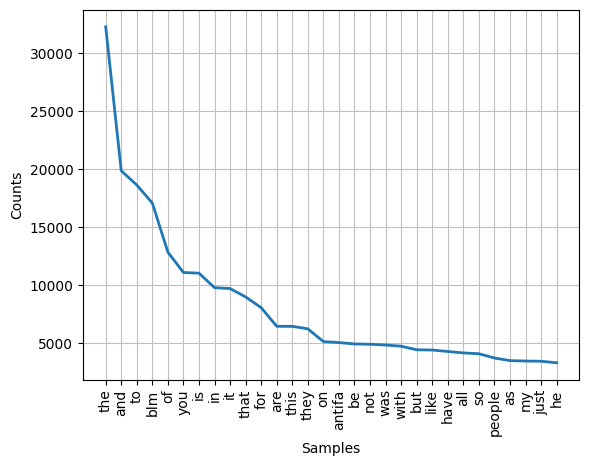

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [6]:
import nltk
from nltk import FreqDist

# Create a list of all words in your dataset
all_words = ' '.join(df['tweet_text_with_sw']).split()

# Plot frequency distribution
freq_dist = FreqDist(all_words)
freq_dist.plot(30, cumulative=False)

In [9]:
df['tweet_text_with_sw'] = df['tweet_text_with_sw'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in neutral_words]))

In [20]:
# Remove rows where 'tweet_text_with_sw' is null
df = df.dropna(subset=['tweet_text_with_sw'])
df = df[df['tweet_text_with_sw'] != '']

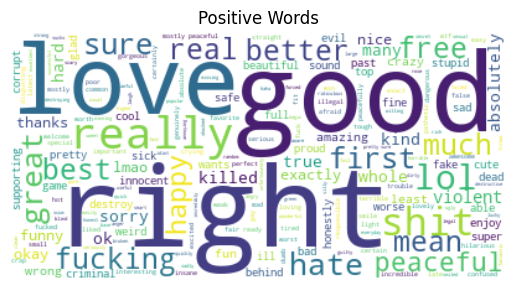

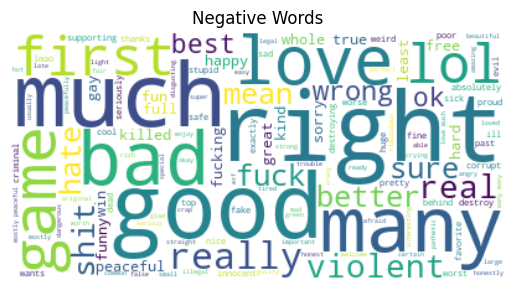

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds
positive_text = ' '.join(df[df['sentiments'] == 'positive']['tweet_text_with_sw'])
negative_text = ' '.join(df[df['sentiments'] == 'negative']['tweet_text_with_sw'])

# Positive Word Cloud
wordcloud = WordCloud(background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Words")
plt.show()

# Negative Word Cloud
wordcloud = WordCloud(background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Words")
plt.show()

In [40]:
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df is your DataFrame and 'tweet_text_with_sw' and 'sentiments' are your columns

# Remove empty tweets
df = df[df['tweet_text_with_sw'].notna()]

# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Separate positive and negative tweets
positive_tweets = df[df['sentiments'] == 'positive']['tweet_text_with_sw']
negative_tweets = df[df['sentiments'] == 'negative']['tweet_text_with_sw']

# Vectorize the tweets
positive_vectorized = vectorizer.fit_transform(positive_tweets)
negative_vectorized = vectorizer.fit_transform(negative_tweets)

# Convert sparse matrix to gensim corpus
positive_corpus = Sparse2Corpus(positive_vectorized, documents_columns=False)
negative_corpus = Sparse2Corpus(negative_vectorized, documents_columns=False)

# Create a dictionary
dictionary = corpora.Dictionary.from_corpus(positive_corpus, 
                                             id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

# Apply LDA model
lda_positive = models.LdaModel(positive_corpus, num_topics=5, id2word=dictionary, passes=15)
lda_negative = models.LdaModel(negative_corpus, num_topics=5, id2word=dictionary, passes=15)

# Display topics
print("Topics in positive tweets:")
topics_positive = lda_positive.print_topics(num_words=4)
for topic in topics_positive:
    print(f"Topic {topic[0]}: Words: {topic[1]}")

print("\nTopics in negative tweets:")
topics_negative = lda_negative.print_topics(num_words=4)
for topic in topics_negative:
    print(f"Topic {topic[0]}: Words: {topic[1]}")


Topics in positive tweets:
Topic 0: Words: 0.015*"billionaire" + 0.014*"jim" + 0.013*"yeah" + 0.012*"letter"
Topic 1: Words: 0.015*"letter" + 0.012*"forms" + 0.012*"jim" + 0.008*"yep"
Topic 2: Words: 0.111*"billionaire" + 0.045*"angie" + 0.012*"letter" + 0.012*"rino"
Topic 3: Words: 0.030*"gently" + 0.028*"loose" + 0.023*"nypd" + 0.019*"data"
Topic 4: Words: 0.041*"billionaire" + 0.024*"jim" + 0.024*"patrol" + 0.022*"letter"

Topics in negative tweets:
Topic 0: Words: 0.037*"blm" + 0.015*"blacklivesmatter" + 0.009*"law" + 0.008*"trump"
Topic 1: Words: 0.018*"blm" + 0.017*"com" + 0.013*"new" + 0.010*"watch"
Topic 2: Words: 0.029*"like" + 0.017*"just" + 0.013*"im" + 0.010*"know"
Topic 3: Words: 0.098*"blm" + 0.036*"antifa" + 0.021*"people" + 0.013*"like"
Topic 4: Words: 0.010*"fuck" + 0.007*"people" + 0.007*"just" + 0.007*"com"


In [43]:
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk

# Download the punkt tokenizer if not already
nltk.download('punkt')

# Assuming df['tweet_text_with_sw'] contains your text data
tweets = df['tweet_text_with_sw'].dropna()  # Remove any NaN rows

# Tokenize the tweets into a list of lists
tokenized_tweets = [nltk.word_tokenize(tweet.lower()) for tweet in tweets]

# Remove stop words
tokenized_tweets = [[word for word in tweet if word not in ENGLISH_STOP_WORDS] for tweet in tokenized_tweets]

# Create a Gensim dictionary and corpus
dictionary = corpora.Dictionary(tokenized_tweets)
corpus = [dictionary.doc2bow(tweet) for tweet in tokenized_tweets]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Prepare the visualization data
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Visualize the topics
pyLDAvis.display(vis_data)


[nltk_data] Downloading package punkt to /Users/alenjose/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.